In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [50]:
maindf = pd.read_csv('quikr_car.csv')

In [51]:
maindf.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [52]:
maindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


Data Quality Issues
1. Change Year to int
2. Change Price to int
3. Change Kms_drive to int
3. KM & Fuel Type has null values
4. Keep first 3 words of name
5. Year has some non year values
6. Price has one non price value i.e., Ask fro Price


In [53]:
maindf['fuel_type'].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

###  Feature Engineering (Feature Transformation)
Data Cleaning

In [54]:
df = maindf.copy()

In [55]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [56]:
df.shape

(892, 6)

In [57]:
df['Price'] = df['Price'].replace('kms','')
df.sample(5)

,name,company,year,Price,kms_driven,fuel_type
572,Renault Duster 85PS Diesel RxL Optional with Nav,Renault,2013,"4,01,919","57,923 kms",Diesel
533,Ford Fiesta SXi 1.6 ABS,Ford,2009,"2,50,000","56,400 kms",Petrol
315,Honda City,Honda,2015,"6,44,999","39,000 kms",Petrol
796,all paper updated tata indica v2 and u,all,n...,"1,45,000",NaN,NaN
482,Maruti Suzuki Eeco 7 STR,Maruti,2013,"2,90,000","70,000 kms",LPG


In [58]:
df = df.loc[df['year'].str.isnumeric()]
df = df.loc[df['Price']!='Ask For Price']
df['Price'] = df['Price'].str.replace(',','')
df['kms_driven'] = df['kms_driven'].str.replace('kms','')
df['kms_driven'] = df['kms_driven'].str.replace(',','')
df = df.loc[df['kms_driven']!='Petrol']
df['kms_driven'].unique()
df['name'] = df['name'].str.split(' ').str.slice(0,3).str.join(' ')
df['year'] = df['year'].astype(int)
df['Price'] = df['Price'].astype(int)
df['kms_driven'] = df['kms_driven'].astype(int)

In [59]:
df['fuel_type'].fillna('Petrol',inplace=True)

In [64]:
df.describe()

,year,Price,kms_driven
count,817.000000,8.170000e+02,817.000000
mean,2012.440636,4.115503e+05,46250.714810
std,4.002354,4.749173e+05,34283.745254
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.900000e+05,56758.000000
max,2019.000000,8.500003e+06,400000.000000


In [65]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel


<AxesSubplot:xlabel='Price'>

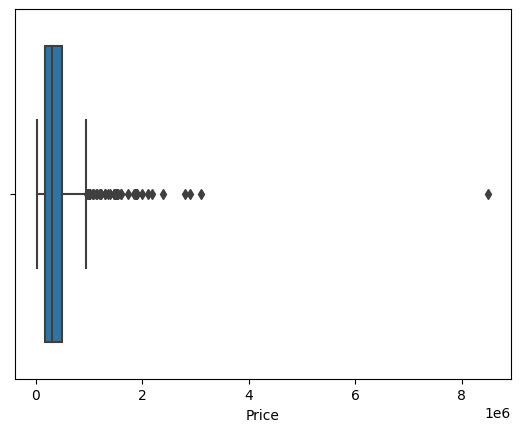

In [66]:
sns.boxplot(x=df['Price'])
#We can see there are lot of outliers in Price

In [68]:
#Removing Outliers with Mean + 3std Technique
Mu_Plus_3std = 3* (df['Price'].std())
df = df.loc[df['Price']<=Mu_Plus_3std]
df = df.reset_index(drop=True)

In [69]:
#Finally saving clean dataset
df.to_csv('Cleaned.csv')

###  Label Encoder & OneHotEncoder

In [70]:
df = pd.read_csv('Cleaned.csv')
X = df[['name','company','year','kms_driven','fuel_type']]
y = df['Price'].values

In [71]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [72]:
Tranformers_ = ColumnTransformer(transformers=[
    ('tf1',OneHotEncoder(sparse=False,drop='first'),[0,1,4])
],remainder='passthrough')

X= Tranformers_.fit_transform(X)
y = df['Price'].values

In [73]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

Transformer1 = ColumnTransformer(transformers = [
    ('tf1',OneHotEncoder(sparse=False,drop='first'),[0,1,4])
],remainder='passthrough')

X=Transformer1.fit_transform(X)

In [79]:
X[0]

array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 

### Model Building

In [80]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [82]:
from sklearn.model_selection import GridSearchCV
models_name = {
    'LR':LinearRegression(),
    'RFR':RandomForestRegressor(),
    'DTR':DecisionTreeRegressor(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'ElasticNet':ElasticNet(),
    'GBR':GradientBoostingRegressor()
}


params_dict = {
    'LR':{'fit_intercept':[True,False],
         'copy_X':[True,False],
         'positive':[True,False]},
    'RFR':{'n_estimators':[10,20,30,50,80],
          'criterion':['squared_error','absolute_error'],'max_depth':[2,5,6,8],'min_samples_split':[2,5,6,8],
          'min_samples_leaf':[2,5,6,8],'max_features':[1,2,3,4],'bootstrap':[True,False]},
    'DTR':{
          'splitter':['best','random'],
          'max_depth':[2,5,6,8],
          'min_samples_split':[2,5,6,8],
          'min_samples_leaf':[2,5,6,8],
          'max_features':[1,2,3,4],
          'max_leaf_nodes':[2,5,6,8]},
    'Lasso':{'alpha':[0.3,0.5,0.8,1,1.5],'fit_intercept':[True,False],'copy_X':[True,False],
            'max_iter':[2,5,6,8],'selection':['cyclic','random']},
    'Ridge':{'alpha':[0.3,0.5,0.8,1,1.5],'fit_intercept':[True,False],'copy_X':[True,False],
            'max_iter':[2,5,6,8]},
    'ElasticNet':{'alpha':[0.3,0.5,0.8,1,1.5],'fit_intercept':[True,False],'copy_X':[True,False],
            'max_iter':[2,5,6,8],'selection':['cyclic','random']},
    'GBR':{'loss':['squared_error','absolute_error'],'learning_rate':[0.1,0.2],'n_estimators':[100,150,200],
            'max_depth':[2,5,6,8],'min_samples_split':[2,5,6,8],'min_samples_leaf':[2,5,6,8]}
}



In [83]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import RandomizedSearchCV


Model_List = []
Accuracy_Score = []
Best_Parameters = []
MAE = []
MSE = []
R2_Score = []
for key,value in models_name.items():
    Model_Parameters = params_dict[key]
    grid = RandomizedSearchCV(value , param_distributions=Model_Parameters, cv=5, return_train_score=False,error_score='raise',n_jobs=-1)
    print(key,'Grid Serach has been completed')
    grid.fit(X_train,y_train)
    #print(key,'Grid has been fit on X_train & y_train')
    '''Entering Metrics values'''
#     MAE.append(mean_absolute_error(y_test,value.predict(X_test)))
#     MSE.append(mean_squared_error(y_test,value.predict(X_test)))
#    R2_Score.append(r2_score(y_test,value.predict(X_test)))
    Model_List.append(key)
    Accuracy_Score.append(grid.best_score_)
    Best_Parameters.append(grid.best_params_)
    print(key, 'model has been completed!')


#Main_list = [Model_List,Accuracy_Score,Best_Parameters]
Result_df = pd.DataFrame({'Model Name':Model_List,'Accuracy':Accuracy_Score,
                          'Best Parameters':Best_Parameters})
print('Done')

LR Grid Serach has been completed
LR model has been completed!
RFR Grid Serach has been completed
RFR model has been completed!
DTR Grid Serach has been completed
DTR model has been completed!
Lasso Grid Serach has been completed
Lasso model has been completed!
Ridge Grid Serach has been completed
Ridge model has been completed!
ElasticNet Grid Serach has been completed
ElasticNet model has been completed!
GBR Grid Serach has been completed
GBR model has been completed!
Done


In [84]:
Result_df

,Model Name,Accuracy,Best Parameters
0,LR,0.392207,"{'positive': True, 'fit_intercept': True, 'cop..."
1,RFR,0.007468,"{'n_estimators': 30, 'min_samples_split': 6, '..."
2,DTR,0.053081,"{'splitter': 'best', 'min_samples_split': 6, '..."
3,Lasso,0.635882,"{'selection': 'random', 'max_iter': 6, 'fit_in..."
4,Ridge,0.683953,"{'max_iter': 2, 'fit_intercept': True, 'copy_X..."
5,ElasticNet,0.390944,"{'selection': 'cyclic', 'max_iter': 5, 'fit_in..."
6,GBR,0.635845,"{'n_estimators': 150, 'min_samples_split': 5, ..."
